## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
from TCGame_Env1 import TicTacToe  #import your class from environment file
env = TicTacToe()

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
#printing default state of environment
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
#print all valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

In [7]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)  
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state,episodes):
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episodes)
    
    z = np.random.random()
    
    if z > epsilon:
        stateKey = Q_state(state)
        action = max(Q_dict[stateKey],key=Q_dict[stateKey].get) # Exploitation
    else:
        actions = [i for i in env.action_space(state)[0]]
        action =  actions[np.random.choice(range(len(actions)))] #Exploration
    
    return action



#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [10]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample =  [('x-x-x-x-x-x-x-x-x',(6,5)),
           ('x-x-x-x-x-x-x-x-x',(1,9)),
           ('x-3-x-x-1-x-x-x-x',(7,5)),
           ('x-5-x-x-x-x-5-7-x',(8,2)),
            ('6-x-x-5-x-x-x-x-x',(1,1)),
          ('x-x-x-9-x-x-6-x-x',(3,3))]
    for v in Sample:
        state = v[0]
        action =v[1]
        States_track[state][action] = []

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [13]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [14]:
learning_rate = 0.01
discount_factor = 0.9
decay_rate = 0.001

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.001

episodes = 50000
saveThreshold  = 100
printThreshold = 100

### Q-update loop ---write your code here

In [15]:
start_time = time.time()
agentWon = 0
environmentWon = 0
tie = 0

for episode in range(episodes):
    ##### Start writing your code from the next line
    env = TicTacToe()
    currentState = env.state
    add_to_dict(currentState)
    rewardState = None
    terminalState = False
    while terminalState != True:
        
        action = epsilon_greedy(currentState,episode)
        
        nextState,reward,terminalState,msg = env.step(currentState,action)
        
        add_to_dict(nextState)
        
        currentStateKey = Q_state(currentState)
        rewardState = currentStateKey
        if terminalState == True:
            if msg == "Agent Won !":
                agentWon +=1
            elif msg == "Environment Won !":
                environmentWon +=1
            else:
                tie +=1
            
            
            #Terminal State
            Q_dict[Q_state(currentState)][action] += learning_rate * (reward - Q_dict[Q_state(currentState)][action])
            
        else:
            currentStateKey = Q_state(currentState);
            nextStateKey = Q_state(nextState);
            max_next = max(Q_dict[nextStateKey],key=Q_dict[nextStateKey].get)
            
            Q_dict[currentStateKey][action] += learning_rate * (reward + discount_factor * (Q_dict[nextStateKey][max_next] - Q_dict[currentStateKey][action]))
    
        currentState = nextState
         
    if(episode + 1) % printThreshold == 0:
        print("Games played %d, Agent Won : %.4f, Environment Won : %.4f, Tie(s) : %.4f"% (episode + 1, agentWon / (episode + 1), environmentWon /(episode + 1), tie / (episode + 1)))
            
     #Saving the weights
#     if(episode + 1)%saveThreshold == 0:
#         save_tracking_states()
#         save_obj(States_track,"States_track")
#         save_obj(Q_dict,'Policy') 
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Games played 100, Agent Won : 0.2700, Environment Won : 0.2500, Tie(s) : 0.4800
Games played 200, Agent Won : 0.2950, Environment Won : 0.2300, Tie(s) : 0.4750
Games played 300, Agent Won : 0.2967, Environment Won : 0.2467, Tie(s) : 0.4567
Games played 400, Agent Won : 0.2825, Environment Won : 0.2775, Tie(s) : 0.4400
Games played 500, Agent Won : 0.2860, Environment Won : 0.2660, Tie(s) : 0.4480
Games played 600, Agent Won : 0.2917, Environment Won : 0.2683, Tie(s) : 0.4400
Games played 700, Agent Won : 0.2757, Environment Won : 0.2714, Tie(s) : 0.4529
Games played 800, Agent Won : 0.2712, Environment Won : 0.2650, Tie(s) : 0.4637
Games played 900, Agent Won : 0.2600, Environment Won : 0.2678, Tie(s) : 0.4722
Games played 1000, Agent Won : 0.2710, Environment Won : 0.2630, Tie(s) : 0.4660
Games played 1100, Agent Won : 0.2755, Environment Won : 0.2636, Tie(s) : 0.4609
Games played 1200, Agent Won : 0.2758, Environment Won : 0.2683, Tie(s) : 0.4558
Games played 1300, Agent Won : 0.2685

Games played 11200, Agent Won : 0.2839, Environment Won : 0.2623, Tie(s) : 0.4537
Games played 11300, Agent Won : 0.2840, Environment Won : 0.2628, Tie(s) : 0.4532
Games played 11400, Agent Won : 0.2841, Environment Won : 0.2620, Tie(s) : 0.4539
Games played 11500, Agent Won : 0.2840, Environment Won : 0.2623, Tie(s) : 0.4537
Games played 11600, Agent Won : 0.2847, Environment Won : 0.2622, Tie(s) : 0.4530
Games played 11700, Agent Won : 0.2846, Environment Won : 0.2620, Tie(s) : 0.4534
Games played 11800, Agent Won : 0.2852, Environment Won : 0.2614, Tie(s) : 0.4534
Games played 11900, Agent Won : 0.2855, Environment Won : 0.2608, Tie(s) : 0.4536
Games played 12000, Agent Won : 0.2853, Environment Won : 0.2611, Tie(s) : 0.4536
Games played 12100, Agent Won : 0.2854, Environment Won : 0.2610, Tie(s) : 0.4536
Games played 12200, Agent Won : 0.2861, Environment Won : 0.2612, Tie(s) : 0.4526
Games played 12300, Agent Won : 0.2859, Environment Won : 0.2615, Tie(s) : 0.4527
Games played 124

Games played 21300, Agent Won : 0.2810, Environment Won : 0.2625, Tie(s) : 0.4565
Games played 21400, Agent Won : 0.2811, Environment Won : 0.2623, Tie(s) : 0.4566
Games played 21500, Agent Won : 0.2812, Environment Won : 0.2622, Tie(s) : 0.4566
Games played 21600, Agent Won : 0.2811, Environment Won : 0.2621, Tie(s) : 0.4569
Games played 21700, Agent Won : 0.2812, Environment Won : 0.2620, Tie(s) : 0.4568
Games played 21800, Agent Won : 0.2811, Environment Won : 0.2622, Tie(s) : 0.4567
Games played 21900, Agent Won : 0.2810, Environment Won : 0.2626, Tie(s) : 0.4564
Games played 22000, Agent Won : 0.2807, Environment Won : 0.2625, Tie(s) : 0.4567
Games played 22100, Agent Won : 0.2808, Environment Won : 0.2629, Tie(s) : 0.4564
Games played 22200, Agent Won : 0.2808, Environment Won : 0.2625, Tie(s) : 0.4567
Games played 22300, Agent Won : 0.2805, Environment Won : 0.2623, Tie(s) : 0.4572
Games played 22400, Agent Won : 0.2803, Environment Won : 0.2625, Tie(s) : 0.4571
Games played 225

Games played 31600, Agent Won : 0.2710, Environment Won : 0.2672, Tie(s) : 0.4617
Games played 31700, Agent Won : 0.2711, Environment Won : 0.2673, Tie(s) : 0.4617
Games played 31800, Agent Won : 0.2711, Environment Won : 0.2671, Tie(s) : 0.4618
Games played 31900, Agent Won : 0.2709, Environment Won : 0.2669, Tie(s) : 0.4622
Games played 32000, Agent Won : 0.2709, Environment Won : 0.2671, Tie(s) : 0.4620
Games played 32100, Agent Won : 0.2710, Environment Won : 0.2671, Tie(s) : 0.4619
Games played 32200, Agent Won : 0.2710, Environment Won : 0.2673, Tie(s) : 0.4617
Games played 32300, Agent Won : 0.2709, Environment Won : 0.2672, Tie(s) : 0.4618
Games played 32400, Agent Won : 0.2710, Environment Won : 0.2673, Tie(s) : 0.4617
Games played 32500, Agent Won : 0.2709, Environment Won : 0.2672, Tie(s) : 0.4619
Games played 32600, Agent Won : 0.2710, Environment Won : 0.2674, Tie(s) : 0.4616
Games played 32700, Agent Won : 0.2709, Environment Won : 0.2674, Tie(s) : 0.4617
Games played 328

Games played 41700, Agent Won : 0.2710, Environment Won : 0.2684, Tie(s) : 0.4606
Games played 41800, Agent Won : 0.2710, Environment Won : 0.2685, Tie(s) : 0.4606
Games played 41900, Agent Won : 0.2710, Environment Won : 0.2685, Tie(s) : 0.4605
Games played 42000, Agent Won : 0.2712, Environment Won : 0.2683, Tie(s) : 0.4605
Games played 42100, Agent Won : 0.2712, Environment Won : 0.2682, Tie(s) : 0.4606
Games played 42200, Agent Won : 0.2712, Environment Won : 0.2681, Tie(s) : 0.4607
Games played 42300, Agent Won : 0.2712, Environment Won : 0.2683, Tie(s) : 0.4605
Games played 42400, Agent Won : 0.2711, Environment Won : 0.2682, Tie(s) : 0.4607
Games played 42500, Agent Won : 0.2712, Environment Won : 0.2682, Tie(s) : 0.4607
Games played 42600, Agent Won : 0.2712, Environment Won : 0.2681, Tie(s) : 0.4608
Games played 42700, Agent Won : 0.2712, Environment Won : 0.2681, Tie(s) : 0.4607
Games played 42800, Agent Won : 0.2713, Environment Won : 0.2682, Tie(s) : 0.4605
Games played 429

#### Check the Q-dictionary

In [16]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.1182594088551903,
              (0, 3): -1.1182521906841512,
              (0, 5): -1.118269224062553,
              (0, 7): -1.118263429272732,
              (0, 9): -1.1182641847322212,
              (1, 1): -1.1182689051300814,
              (1, 3): -1.118267165016721,
              (1, 5): -1.1182681355157977,
              (1, 7): -1.1182552344459058,
              (1, 9): -1.11825486798781,
              (2, 1): -1.1182675314149497,
              (2, 3): -1.1182638030237402,
              (2, 5): -1.1182532073684424,
              (2, 7): -1.118260190123071,
              (2, 9): -1.1182686228918575,
              (3, 1): -1.1182570790321924,
              (3, 3): -1.1181796715736512,
              (3, 5): -1.1182674993839403,
              (3, 7): -1.1182566476941256,
              (3, 9): -1.1182442946171656,
              (4, 1): -1.1182543735504062,
              (4, 3): -1.1182639944110853,
              (4, 5):

In [17]:
len(Q_dict)

130485

#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(*args, **kw)>

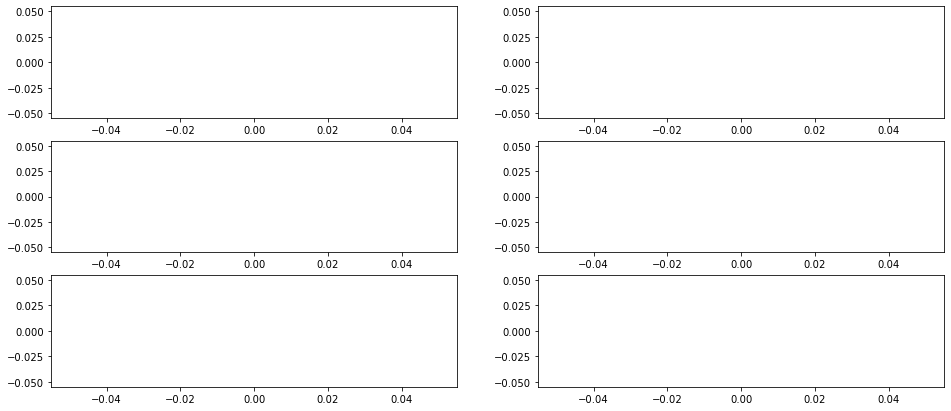

In [18]:
# Write the code for plotting the graphs for state-action pairs tracked
Sample =  [('x-x-x-x-x-x-x-x-x',(6,5)),
           ('x-x-x-x-x-x-x-x-x',(1,9)),
           ('x-3-x-x-1-x-x-x-x',(7,5)),
           ('x-5-x-x-x-x-5-7-x',(8,2)),
            ('6-x-x-5-x-x-x-x-x',(1,1)),
          ('x-x-x-9-x-x-6-x-x',(3,3))]

plt.figure(0, figsize=(16,7))


state = Sample[0][0]
action = Sample[0][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(321)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show

state = Sample[1][0]
action = Sample[1][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(322)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show


state = Sample[2][0]
action = Sample[2][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(323)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show

state = Sample[3][0]
action = Sample[3][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(324)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show

state = Sample[4][0]
action = Sample[4][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(325)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show

state = Sample[5][0]
action = Sample[5][1]
x_axis = np.asarray(range(0, len(States_track[state][action])))
plt.subplot(326)
plt.plot(x_axis,np.asarray(States_track[state][action]))
plt.show




### Epsilon - decay check

In [18]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

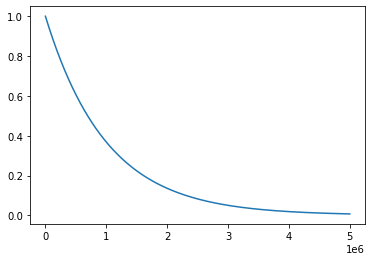

In [22]:
plt.plot(time, epsilon)
plt.show()